In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers, regularizers, initializers
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.utils import plot_model

In [2]:
input_shape = (166,)
num_classes = 10

In [3]:
complex_model = Sequential()
complex_model.add(Dense(256, input_shape=input_shape, activation='elu', kernel_initializer=GlorotUniform(), name='dense_1'))
complex_model.add(Dense(128, activation='relu', name='dense_2'))
complex_model.add(Dense(256, activation='relu', kernel_initializer=HeUniform(), name='dense_3'))
complex_model.add(Dense(512, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), name='dense_4_L1'))
complex_model.add(Dropout(0.2, name='dropout_1'))
complex_model.add(Dense(256, activation='relu', name='dense_5'))
complex_model.add(Dense(64, activation='relu', name='dense_6'))
complex_model.add(Dense(1024, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_7_L2'))
complex_model.add(Dense(512, activation='relu', name='dense_8'))
complex_model.add(Dropout(0.4, name='dropout_2'))
complex_model.add(Dense(256, activation='relu', kernel_initializer=HeUniform(), name='dense_9'))
complex_model.add(Dense(128, activation='relu', name='dense_10'))
complex_model.add(Dense(128, activation='leaky_relu', name='dense_11'))
complex_model.add(Dropout(0.2, name='dropout_3'))
complex_model.add(Dense(64, activation='elu', kernel_initializer=GlorotUniform(), name='dense_12'))
complex_model.add(Dense(num_classes, activation='softmax', name='output_layer'))


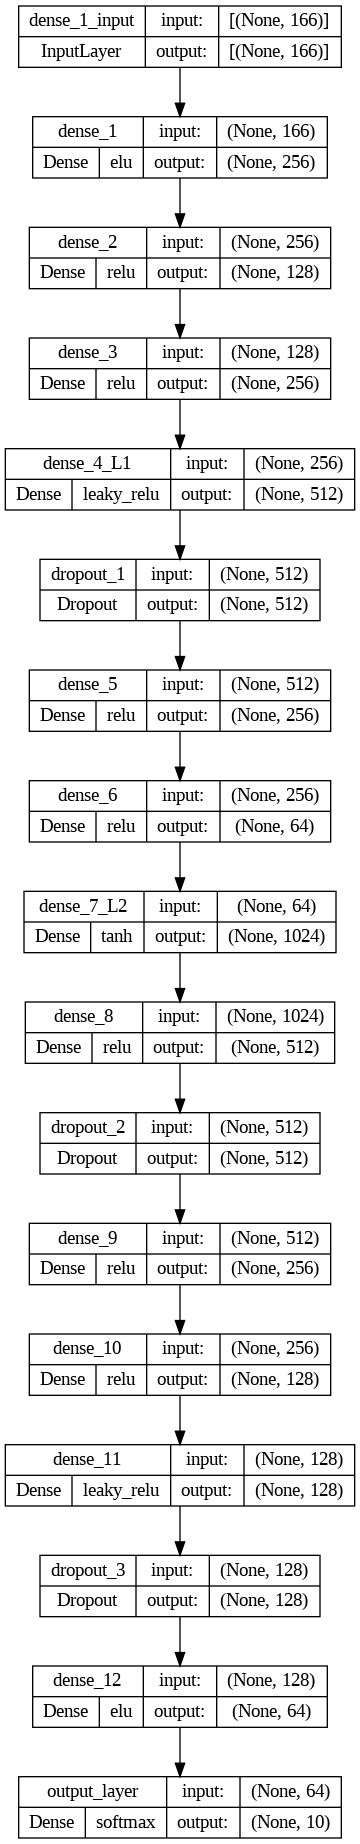

In [4]:
tf.keras.utils.plot_model(
    complex_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=False,
)

In [5]:
simple_model = Sequential()
simple_model.add(Dense(64, input_shape=input_shape, activation='relu', name='dense_1'))
simple_model.add(Dense(128, activation='relu', name='dense_2'))
simple_model.add(Dense(256, activation='relu', name='dense_3'))
simple_model.add(Dense(128, activation='relu', name='dense_4'))
simple_model.add(Dense(32, activation='relu', name='dense_5'))
simple_model.add(Dense(num_classes, activation='softmax', name='output_layer'))


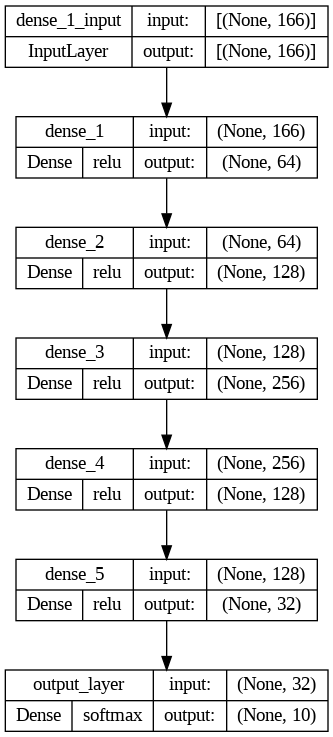

In [6]:
tf.keras.utils.plot_model(
    simple_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=False,
)

In [7]:
dropout_model = Sequential()
dropout_model.add(Dense(128, input_shape=input_shape, activation='elu', name='dense_1'))
dropout_model.add(Dense(256, activation='relu', name='dense_2'))
dropout_model.add(Dense(512, activation='relu', name='dense_3'))
dropout_model.add(Dropout(0.5, name='dropout_1'))
dropout_model.add(Dense(256, activation='relu', name='dense_4'))
dropout_model.add(Dense(512, activation='relu', name='dense_5'))
dropout_model.add(Dropout(0.5, name='dropout_2'))
dropout_model.add(Dense(128, activation='relu', name='dense_6'))
dropout_model.add(Dense(64, activation='relu', name='dense_7'))
dropout_model.add(Dense(32, activation='elu', name='dense_8'))
dropout_model.add(Dense(num_classes, activation='softmax', name='output_layer'))


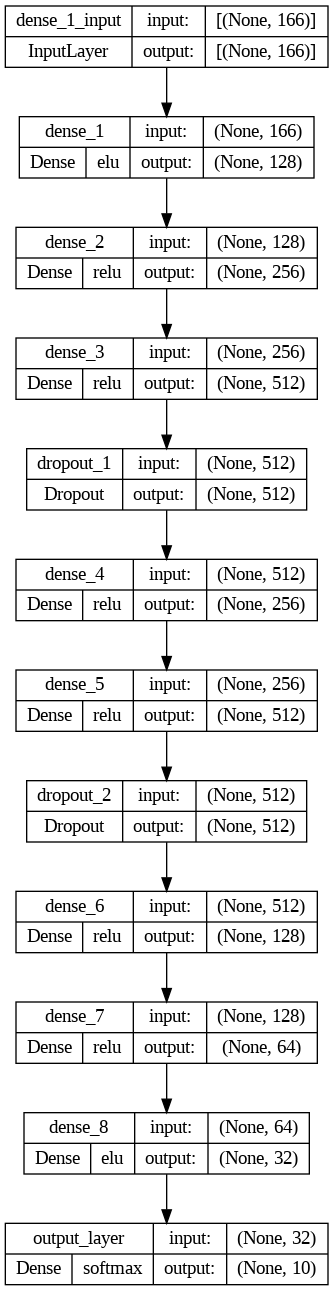

In [8]:
tf.keras.utils.plot_model(
    dropout_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=False,
)